In [2]:
import pandas as pd 
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb

df = pd.read_csv('houses.csv')
df.head()

,price,bd&ba,sqft,address
0,"689,000","3bd,3ba","2,235","7368 Flowerwood Way,, ,Sacramento, CA 95831"
1,"625,000","4bd,3ba","2,299","3707 Iskenderun Ave,, ,Sacramento, CA 95834"
2,"224,500","1bd,1ba",667,"4200 E Commerce Way #1113,, ,Sacramento, CA 95834"
3,"340,000","3bd,2ba","1,084","6 Ashley Oaks Ct,, ,Sacramento, CA 95815"
4,"399,000","3bd,2ba","1,394","7970 Bastien Ct,, ,Sacramento, CA 95828"


## Let's clean our data

In [3]:
# check na value
df.isna().sum()

price       0
bd&ba      58
sqft        0
address     0
dtype: int64

In [4]:
df[df['bd&ba'].isna()]

,price,bd&ba,sqft,address
104,"375,000",NaN,217 Silver Eagle Rd,"217 Silver Eagle Rd,, ,Sacramento, CA 95838"
141,"439,000",NaN,7001 Garden Hwy,"7001 Garden Hwy,, ,Sacramento, CA 95837"
179,"1,755,000",NaN,270 South Ave,"270 South Ave,, ,Sacramento, CA 95838"
215,"1,755,000",NaN,260 South Ave,"260 South Ave,, ,Sacramento, CA 95838"
269,"4,550,000",NaN,4101 Taylor St,"4101 Taylor St,, ,Sacramento, CA 95838"
276,"325,000",NaN,22nd St,"22nd St,, ,Rio Linda, CA 95673"
300,"1,250,000",NaN,1 (on 3.25 acres),"6140 Lemon Hill Ave,, ,Sacramento, CA 95824"
334,"100,000",NaN,1625 Los Robles Blvd,"1625 Los Robles Blvd,, ,Sacramento, CA 95838"
373,"300,000",NaN,2009 Chinatown Aly,"2009 Chinatown Aly,, ,Sacramento, CA 95814"
391,"250,000",NaN,Branch St,"Branch St,, ,Sacramento, CA 95815"


I checked those houses on Trulia and they are actually not houses but lands. For the scope of this project, we will remove these lines

In [5]:
df.dropna(inplace=True)

In [6]:
df.isna().sum()

price      0
bd&ba      0
sqft       0
address    0
dtype: int64

Let's take a look at unique values in 'bd&ba' column

In [7]:
df['bd&ba'].unique()

array(['3bd,3ba', '4bd,3ba', '1bd,1ba', '3bd,2ba', '2bd,1ba', '3bd,1ba',
       '1bd,2ba', '5bd,3ba', '4bd,2ba', '2bd,2ba', 'Studio', '2bd',
       '5bd,5ba', '2bd,3ba', '3bd,4ba', '4bd,4ba', '5bd,2ba', '4bd,1ba',
       '4bd', '1bd', '5bd,4ba', '4bd,5ba', '6bd', '6bd,2ba', '7bd,4ba',
       '8bd,8ba', '5bd,6ba', '7bd', '5bd', '10bd', '6bd,4ba', '6bd,3ba',
       '6bd,9ba', '3bd', 'Studio,2ba', '18bd', '8bd', '5bd,7ba',
       '6bd,5ba', '6bd,6ba', '6bd,8ba'], dtype=object)

In [8]:
df[df['bd&ba']=='Studio,2ba']

,price,bd&ba,sqft,address
974,"429,000","Studio,2ba","1,488","2223 Marconi Ave,, ,Sacramento, CA 95821"


In [9]:
# We're going to drop this row as well
df = df[df['bd&ba'] != 'Studio,2ba']

In [10]:
df['bd&ba'].unique()

array(['3bd,3ba', '4bd,3ba', '1bd,1ba', '3bd,2ba', '2bd,1ba', '3bd,1ba',
       '1bd,2ba', '5bd,3ba', '4bd,2ba', '2bd,2ba', 'Studio', '2bd',
       '5bd,5ba', '2bd,3ba', '3bd,4ba', '4bd,4ba', '5bd,2ba', '4bd,1ba',
       '4bd', '1bd', '5bd,4ba', '4bd,5ba', '6bd', '6bd,2ba', '7bd,4ba',
       '8bd,8ba', '5bd,6ba', '7bd', '5bd', '10bd', '6bd,4ba', '6bd,3ba',
       '6bd,9ba', '3bd', '18bd', '8bd', '5bd,7ba', '6bd,5ba', '6bd,6ba',
       '6bd,8ba'], dtype=object)

In [11]:
df[df['bd&ba']=='Studio']

,price,bd&ba,sqft,address
19,"550,000",Studio,"3,180","715 Dixieanne Ave,, ,Sacramento, CA 95815"
34,"399,000",Studio,"1,623 (on 0.75 acres)","5653 Martin Luther King Jr Blvd,, ,Sacramento,..."
42,"989,000",Studio,"2,982","1003 40th St,, ,Sacramento, CA 95819"
352,"1,750,000",Studio,"6,000","1421 G St,, ,Sacramento, CA 95814"
434,"518,000",Studio,"1,936","3424 Viking Dr,, ,Sacramento, CA 95827"
617,"995,000",Studio,"1,600 (on 2.50 acres)","4851 Warren Ave,, ,Sacramento, CA 95838"
764,"1,587,500",Studio,"7,920 (on 1 acre)","1875 Glenrose Ave,, ,Sacramento, CA 95815"
879,"440,000",Studio,"2,057","8505 German Dr,, ,Sacramento, CA 95828"
896,"499,000",Studio,841,"5140 42nd St,, ,Sacramento, CA 95820"
944,"900,000",Studio,"1,900 (on 0.25 acres)","8921 Canberra Dr,, ,Sacramento, CA 95826"


Upon checking the studio house in trulia, those information are lacking. And since there's only 10 records, we're dropping them as well


In [12]:
df = df[df['bd&ba']!='Studio']

In [13]:
df['bd&ba'].unique()

array(['3bd,3ba', '4bd,3ba', '1bd,1ba', '3bd,2ba', '2bd,1ba', '3bd,1ba',
       '1bd,2ba', '5bd,3ba', '4bd,2ba', '2bd,2ba', '2bd', '5bd,5ba',
       '2bd,3ba', '3bd,4ba', '4bd,4ba', '5bd,2ba', '4bd,1ba', '4bd',
       '1bd', '5bd,4ba', '4bd,5ba', '6bd', '6bd,2ba', '7bd,4ba',
       '8bd,8ba', '5bd,6ba', '7bd', '5bd', '10bd', '6bd,4ba', '6bd,3ba',
       '6bd,9ba', '3bd', '18bd', '8bd', '5bd,7ba', '6bd,5ba', '6bd,6ba',
       '6bd,8ba'], dtype=object)

### Let's separate bd&ba into two columns

In [14]:
df[['bd','ba']] = df['bd&ba'].str.split(',',expand=True)

In [15]:
df

,price,bd&ba,sqft,address,bd,ba
0,"689,000","3bd,3ba","2,235","7368 Flowerwood Way,, ,Sacramento, CA 95831",3bd,3ba
1,"625,000","4bd,3ba","2,299","3707 Iskenderun Ave,, ,Sacramento, CA 95834",4bd,3ba
2,"224,500","1bd,1ba",667,"4200 E Commerce Way #1113,, ,Sacramento, CA 95834",1bd,1ba
3,"340,000","3bd,2ba","1,084","6 Ashley Oaks Ct,, ,Sacramento, CA 95815",3bd,2ba
4,"399,000","3bd,2ba","1,394","7970 Bastien Ct,, ,Sacramento, CA 95828",3bd,2ba
...,...,...,...,...,...,...
1120,"519,900","3bd,2ba","1,430","4900 Boyd Dr,, ,Carmichael, CA 95608",3bd,2ba
1121,"369,900","2bd,2ba","1,281","2637 Independence Ave,, ,West Sacramento, CA 9...",2bd,2ba
1122,"799,000","4bd,4ba","3,152","9867 Cape Verde Dr,, ,Elk Grove, CA 95757",4bd,4ba
1123,"485,000","3bd,2ba","1,262","1909 Yarnell Way,, ,Elk Grove, CA 95758",3bd,2ba


Looks good so far, now we can remove the 'bd' and 'ba' in our column and turn it into int type

In [16]:
df['bd'] = df['bd'].str.replace('bd','')
df['ba'] = df['ba'].str.replace('ba','')

In [17]:
df

,price,bd&ba,sqft,address,bd,ba
0,"689,000","3bd,3ba","2,235","7368 Flowerwood Way,, ,Sacramento, CA 95831",3,3
1,"625,000","4bd,3ba","2,299","3707 Iskenderun Ave,, ,Sacramento, CA 95834",4,3
2,"224,500","1bd,1ba",667,"4200 E Commerce Way #1113,, ,Sacramento, CA 95834",1,1
3,"340,000","3bd,2ba","1,084","6 Ashley Oaks Ct,, ,Sacramento, CA 95815",3,2
4,"399,000","3bd,2ba","1,394","7970 Bastien Ct,, ,Sacramento, CA 95828",3,2
...,...,...,...,...,...,...
1120,"519,900","3bd,2ba","1,430","4900 Boyd Dr,, ,Carmichael, CA 95608",3,2
1121,"369,900","2bd,2ba","1,281","2637 Independence Ave,, ,West Sacramento, CA 9...",2,2
1122,"799,000","4bd,4ba","3,152","9867 Cape Verde Dr,, ,Elk Grove, CA 95757",4,4
1123,"485,000","3bd,2ba","1,262","1909 Yarnell Way,, ,Elk Grove, CA 95758",3,2


In [50]:
df[df['ba'].isna()]

,price,bd&ba,sqft,address,bd,ba
21,565000,2bd,"2,030","4700 Large Oak Ct,, ,Sacramento, CA 95841",2,None
24,597000,2bd,"2,442","2700 Matheson Way,, ,Sacramento, CA 95864",2,None
48,459900,2bd,"1,638","2509 Michelle Dr,, ,Sacramento, CA 95821",2,None
56,685000,2bd,"2,185","3323 Routier Rd,, ,Sacramento, CA 95827",2,None
57,455000,2bd,"1,025","8501 German Dr,, ,Sacramento, CA 95828",2,None
...,...,...,...,...,...,...
1062,2400000,3bd,"6,186","1317 G St,, ,Sacramento, CA 95814",3,None
1075,669990,2bd,"1,538","2817 Marshall Way,, ,Sacramento, CA 95818",2,None
1090,639000,1bd,420 Cleveland Ave,"420 Cleveland Ave,, ,Sacramento, CA 95833",1,None
1092,2500000,5bd,"2,457 (on 6.50 acres)","7901 Stevenson Ave,, ,Sacramento, CA 95828",5,None


In [53]:
df[df['sqft'] == '778 (on 0.25 acres)']

,price,bd&ba,sqft,address,bd,ba
176,359000,"2bd,1ba",778 (on 0.25 acres),"5348 Poplar Blvd,, ,North Highlands, CA 95660",2,1


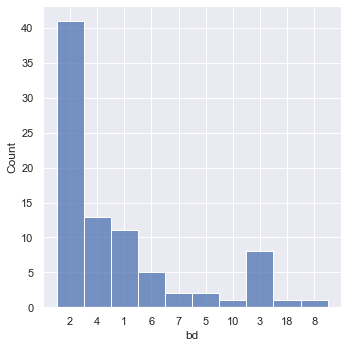

In [51]:
sns.displot(df[df['ba'].isna()], x='bd');

In [55]:
df[df['bd'] == "18"]

,price,bd&ba,sqft,address,bd,ba
975,3999995,18bd,2512 28th Ave,"2512 28th Ave,, ,Sacramento, CA 95822",18,None


In [ ]:
sns.displot[]

Now, let's convert it into integer type

In [18]:
df['ba'].isna().sum()

85

## Price column cleaning

In [19]:
df[df['ba'].isna()].price

21        565,000
24        597,000
48        459,900
56        685,000
57        455,000
          ...    
1062    2,400,000
1075      669,990
1090      639,000
1092    2,500,000
1093      250,000
Name: price, Length: 85, dtype: object

In [ ]:
# Need regular expression to make it cleaner

In [32]:
df['price'] = df['price'].str.replace(',','')

In [33]:
df['price'] = df['price'].str.replace('+','')

C:\Users\Test\AppData\Local\Temp/ipykernel_22824/3665305749.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['price'] = df['price'].str.replace('+','')


In [35]:
df['price'] = df['price'].astype(int)

In [36]:
df.dtypes

price       int32
bd&ba      object
sqft       object
address    object
bd         object
ba         object
dtype: object

## Price

Price distribution

(100000.0, 1500000.0)

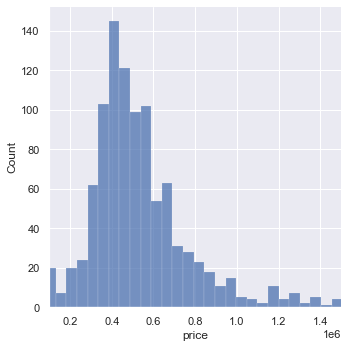

In [47]:
sns.set_theme(style="darkgrid")
# plt.ticklabel_format(style = 'plain')
# ax.set(ylim=(10, 40))


sns.displot(df, x='price');
plt.xlim(100000, 1500000)

In [49]:
df['sqft'].unique()

array(['2,235', '2,299', '667', '1,084', '1,394', '840', '1,018', '2,013',
       '1,125', '3,420 (on 0.50 acres)', '1,149 (on 0.25 acres)', '1,324',
       '1,716', '1,584', '2,219', '1,184', '1,440', '1,697', '2,090',
       '1,160', '2,030', '1,000', '3,651', '2,442',
       '1,645 (on 0.25 acres)', '2,195', '1,838 (on 0.25 acres)', '1,193',
       '1,984', '2,097', '1,887', '1,388', '1,722',
       '1,144 (on 0.75 acres)', '1,471', '1,762', '2,225 (on 0.25 acres)',
       '1,229', '2,202', '1,165', '2,694', '682', '1,897 (on 1.75 acres)',
       '1,209', '1,686', '1,638', '1,001', '1,353', '1,272', '2,017',
       '2,517 (on 0.50 acres)', '1,008', '2,185', '1,025',
       '2,322 (on 0.25 acres)', '2,298', '1,417', '1,684', '970', '3,046',
       '2,689', '1,467', '1,434', '2,190', '2,845 (on 0.25 acres)',
       '2,517', '1,323', '1,940 (on 0.25 acres)', '1,456', '2,126',
       '2,011', '1,163', '3,856 (on 0.75 acres)', '924', '1,709', '1,593',
       '1,320', '1,261', '1,504', '7

## Zip code
https://medium.com/@krexvelasco/transforming-categorical-information-into-usable-measures-in-a-machine-learning-model-e2910bbb3fc7

## EDA

squarefeet and price 

In [ ]:
sb.scatterplot(df, x='price', y=)